<h1> <div align="center">Network Intrusion Detection </div></h1>

---
---


<h2>Problem Statement:</h2> 

To detect network intrusions on a system based on information on attacks in the past.

## **Project Planning :**
&nbsp;


### 1. Exploratory Data Analysis
### 2. Data Preprocessing
- Null value treatment
- Feature Encoding
- Treating Duplicate datapoints
- Feature Selection

### 3. Model Building
### 4. Model Inference

### Imports

In [ ]:
# Necessary modules
import random
random.seed(22)
import numpy as np
import pandas as pd
import pickle 

# Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
sns.set_context('notebook')
matplotlib.rcParams['figure.figsize'] = (12,8)
import warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_selection import mutual_info_classif, VarianceThreshold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


##1. Exploratory Data Analysis

In [ ]:
df = pd.read_csv("Static_dataset.csv")
df.head()

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268074 entries, 0 to 268073
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         268074 non-null  object 
 1   FQDN_count        268074 non-null  int64  
 2   subdomain_length  268074 non-null  int64  
 3   upper             268074 non-null  int64  
 4   lower             268074 non-null  int64  
 5   numeric           268074 non-null  int64  
 6   entropy           268074 non-null  float64
 7   special           268074 non-null  int64  
 8   labels            268074 non-null  int64  
 9   labels_max        268074 non-null  int64  
 10  labels_average    268074 non-null  float64
 11  longest_word      268066 non-null  object 
 12  sld               268074 non-null  object 
 13  len               268074 non-null  int64  
 14  subdomain         268074 non-null  int64  
 15  Target Attack     268074 non-null  int64  
dtypes: float64(2), int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FQDN_count,268074.0,22.286596,6.001205,2.000000,18.000000,24.000000,27.000000,36.000000
subdomain_length,268074.0,6.059021,3.899505,0.000000,3.000000,7.000000,10.000000,23.000000
upper,268074.0,0.845420,4.941929,0.000000,0.000000,0.000000,0.000000,32.000000
lower,268074.0,10.410014,3.207725,0.000000,10.000000,10.000000,10.000000,34.000000
numeric,268074.0,6.497586,4.499866,0.000000,0.000000,8.000000,10.000000,12.000000
entropy,268074.0,2.485735,0.407709,0.219195,2.054029,2.570417,2.767195,4.216847
special,268074.0,4.533577,2.187683,0.000000,2.000000,6.000000,6.000000,7.000000
labels,268074.0,4.788823,1.803256,1.000000,3.000000,6.000000,6.000000,7.000000
labels_max,268074.0,8.252233,4.415355,2.000000,7.000000,7.000000,7.000000,32.000000
labels_average,268074.0,4.802239,4.573066,2.000000,3.166667,3.666667,4.000000,32.000000


In [ ]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 16
Number of Instances In Dataset :  268074


In [ ]:
# Get numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.values
print('Numeric cols :',num_cols)

Numeric cols : ['FQDN_count' 'subdomain_length' 'upper' 'lower' 'numeric' 'entropy'
 'special' 'labels' 'labels_max' 'labels_average' 'len' 'subdomain'
 'Target Attack']


In [ ]:
# Get Non-numeric/categorical columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns.values
print('Categorical cols :',cat_cols)

Categorical cols : ['timestamp' 'longest_word' 'sld']


value counts
1    147179
0    120895
Name: Target Attack, dtype: int64


<AxesSubplot:xlabel='Target Attack', ylabel='count'>

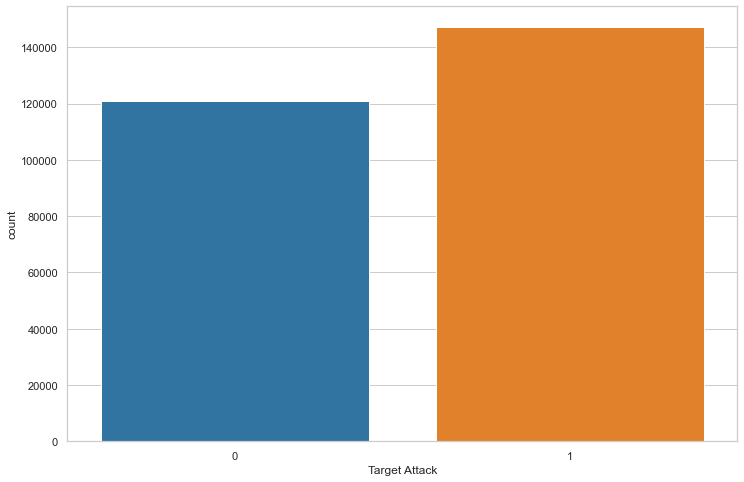

In [ ]:
print('value counts')
print(df['Target Attack'].value_counts())

# Countplot of Target (Target Attack)
sns.countplot(df['Target Attack'])



value counts (%)
1    54.9
0    45.1
Name: Target Attack, dtype: float64


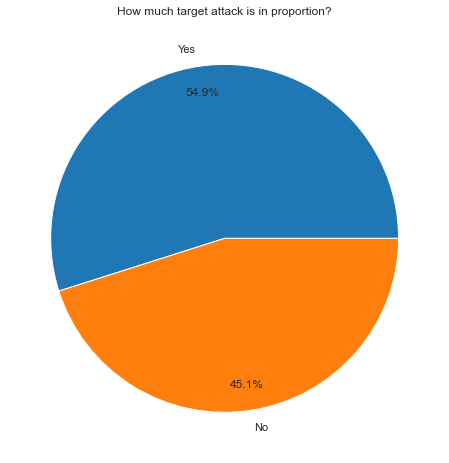

In [ ]:
print('\nvalue counts (%)')
print(round(100*df['Target Attack'].value_counts()/(df['Target Attack'].count()),2))

sizes = dict(df['Target Attack'].value_counts())
plt.title("How much target attack is in proportion?")
plt.pie(sizes.values(), labels=['Yes', 'No'], autopct="%.1f%%", pctdistance=0.85)

plt.show()

In [ ]:
# Check for missing data

# Number of missing values
print(df.isnull().sum().sort_values(ascending=False))

longest_word        8
timestamp           0
FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
sld                 0
len                 0
subdomain           0
Target Attack       0
dtype: int64


<AxesSubplot:>

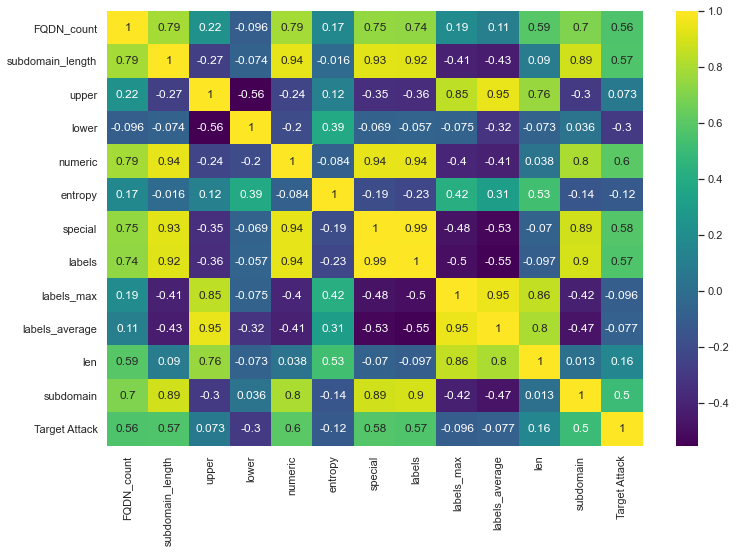

In [ ]:
# Correlation plot
sns.heatmap(df.dropna().corr(), annot=True, cmap='viridis')

Target Attack       1.000000
numeric             0.599252
special             0.582107
subdomain_length    0.572053
labels              0.569414
FQDN_count          0.563563
subdomain           0.502469
len                 0.159437
upper               0.072895
labels_average     -0.077167
labels_max         -0.096350
entropy            -0.119050
lower              -0.295599
Name: Target Attack, dtype: float64

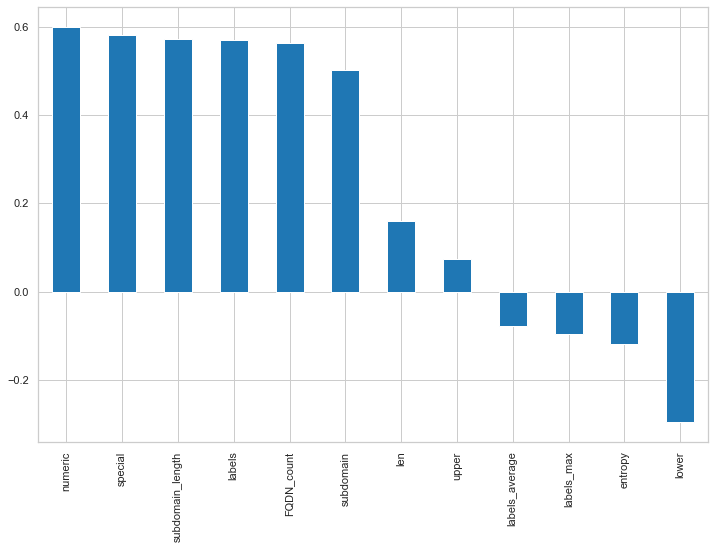

In [ ]:
#checking the correlation with respect to target variable
target_corr = df.corr()['Target Attack'].sort_values(ascending=False)
target_corr[1:].plot.bar()
target_corr

In [ ]:
target_corr_abs = abs(target_corr).sort_values(ascending=False)
target_corr_abs

Target Attack       1.000000
numeric             0.599252
special             0.582107
subdomain_length    0.572053
labels              0.569414
FQDN_count          0.563563
subdomain           0.502469
lower               0.295599
len                 0.159437
entropy             0.119050
labels_max          0.096350
labels_average      0.077167
upper               0.072895
Name: Target Attack, dtype: float64

In [ ]:
# summary statistics for the numeric, grouped by the Target Attack.
df.groupby('Target Attack')['numeric'].describe()

,count,mean,std,min,25%,50%,75%,max
Target Attack,,,,,,,,
0,120895.0,3.522313,4.593332,0.0,0.0,0.0,8.0,12.0
1,147179.0,8.941520,2.511282,0.0,8.0,9.0,11.0,12.0


In [ ]:
# summary statistics for the special, grouped by the Target Attack.
df.groupby('Target Attack')['special'].describe()

,count,mean,std,min,25%,50%,75%,max
Target Attack,,,,,,,,
0,120895.0,3.128483,2.239888,0.0,1.0,2.0,6.0,7.0
1,147179.0,5.687741,1.281525,0.0,6.0,6.0,6.0,6.0


<AxesSubplot:ylabel='Count'>

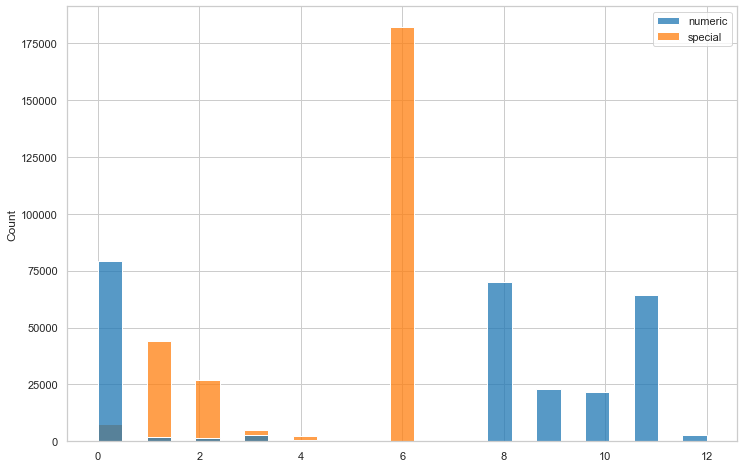

In [ ]:
# Histogram of special and numeric           
sns.histplot([df['numeric'],df['special']], kde=False, bins=25)
# sns.histplot(df['special'], kde=False)

In [ ]:
# summary statistics for the labels, grouped by the Target Attack.
df.groupby('Target Attack')['labels'].describe()

,count,mean,std,min,25%,50%,75%,max
Target Attack,,,,,,,,
0,120895.0,3.655891,1.827249,1.0,2.0,3.0,6.0,7.0
1,147179.0,5.719430,1.122430,1.0,6.0,6.0,6.0,7.0


In [ ]:
# summary statistics for the subdomain_length, grouped by the Target Attack.
df.groupby('Target Attack')['subdomain_length'].describe()

,count,mean,std,min,25%,50%,75%,max
Target Attack,,,,,,,,
0,120895.0,3.597725,4.025141,0.0,0.0,3.0,7.0,23.0
1,147179.0,8.080766,2.307555,0.0,7.0,8.0,10.0,20.0


<AxesSubplot:xlabel='len', ylabel='subdomain_length'>

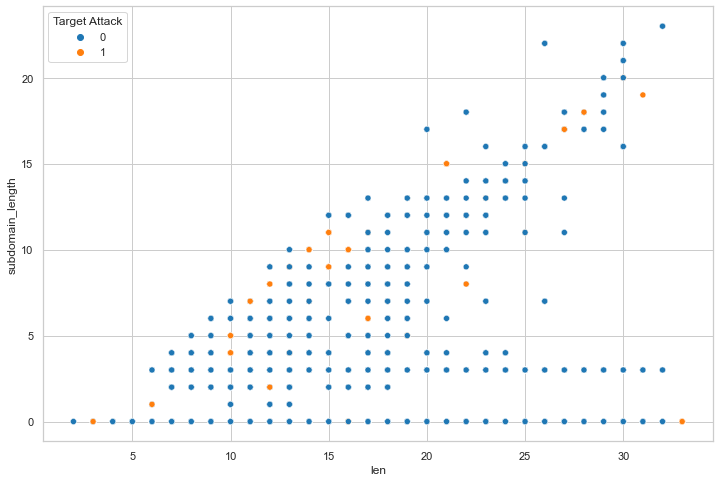

In [ ]:
sns.scatterplot('len','subdomain_length', data=df,hue='Target Attack')

In [ ]:
print('Unique timestamp :',df['timestamp'].unique(),'\n')
print('Value counts of timestamp :\n',df['timestamp'].value_counts())
df.drop(['timestamp'], axis=1, inplace=True) 

Unique timestamp : ['56:19.8' '07:23.9' '23:15.1' ... '31:45.8' '51:38.3' '00:40.7'] 

Value counts of timestamp :
 49:26.7    46
49:27.5    43
49:27.1    42
49:27.4    39
49:26.9    35
           ..
17:24.3     1
24:38.0     1
32:44.2     1
31:35.2     1
49:40.3     1
Name: timestamp, Length: 35924, dtype: int64


In [ ]:
print('Unique longest_word :',df['longest_word'].unique(),'\n')
print('Value counts of longest_word :\n',df['longest_word'].value_counts())

Unique longest_word : ['2' 'local' 'pforzheim' ... 'match' 'pantheon' 'sizer'] 

Value counts of longest_word :
 2          109981
4           70188
N            4498
C            2969
9            1906
            ...  
onenote         1
airdrop         1
mal             1
cres            1
yaa             1
Name: longest_word, Length: 6224, dtype: int64


In [ ]:
print('Unique sld :',df['sld'].unique(),'\n')
print('Value counts of sld :\n',df['sld'].value_counts())

Unique sld : ['192' 'local' 'pforzheim-bisons' ... 'telia' 'boomstream' 'e2ma'] 

Value counts of sld :
 192                                 109517
224                                  70188
FHEPFCELEHFCEPFFFACACACACACACABN      4498
DESKTOP-3JF04TC                       1961
239                                   1906
                                     ...  
cicresearch                              1
queue-it                                 1
lahemal                                  1
bukkit                                   1
yaarlnk                                  1
Name: sld, Length: 11112, dtype: int64


## 2. Data Preprocessing
- Null value treatment
- Feature Encoding
- Treating Duplicate datapoints
- Feature Selection

In [ ]:
# Null value treatment
df = df.replace(np.nan, 0)

In [ ]:
# Feature Encoding
# Converting Cat columns to Num columns
hash = FeatureHasher(n_features=5, input_type='string')

In [ ]:
longest_word = hash.fit_transform(df[['longest_word']].astype(str).values).todense()
longest_word = pd.DataFrame(longest_word, columns=['longest_word_hash'+str(i) for i in range(1,6)])
longest_word

,longest_word_hash1,longest_word_hash2,longest_word_hash3,longest_word_hash4,longest_word_hash5
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
268069,0.0,0.0,0.0,0.0,-1.0
268070,0.0,1.0,0.0,0.0,0.0
268071,0.0,1.0,0.0,0.0,0.0
268072,0.0,0.0,0.0,1.0,0.0


In [ ]:
sld = hash.fit_transform(df[['sld']].astype(str).values).todense()
sld = pd.DataFrame(sld, columns=['sld'+str(i) for i in range(1,6)])
sld

,sld1,sld2,sld3,sld4,sld5
0,0.0,-1.0,0.0,0.0,0.0
1,0.0,-1.0,0.0,0.0,0.0
2,0.0,-1.0,0.0,0.0,0.0
3,0.0,-1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
268069,1.0,0.0,0.0,0.0,0.0
268070,0.0,-1.0,0.0,0.0,0.0
268071,0.0,-1.0,0.0,0.0,0.0
268072,0.0,1.0,0.0,0.0,0.0


In [ ]:
df.drop(['longest_word', 'sld'],axis=1,inplace=True)
df = pd.concat([df,longest_word,sld],axis=1)
df

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,...,longest_word_hash1,longest_word_hash2,longest_word_hash3,longest_word_hash4,longest_word_hash5,sld1,sld2,sld3,sld4,sld5
0,27,10,0,10,11,2.570417,6,6,7,3.666667,...,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
1,27,10,0,10,11,2.767195,6,6,7,3.666667,...,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
2,26,9,0,10,10,2.742338,6,6,7,3.500000,...,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
3,27,10,0,10,11,2.570417,6,6,7,3.666667,...,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
4,15,9,0,11,0,2.929439,4,3,5,4.333333,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268069,18,3,0,16,0,2.338623,2,3,10,5.333333,...,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0
268070,27,10,0,10,11,2.767195,6,6,7,3.666667,...,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
268071,27,10,0,10,11,2.767195,6,6,7,3.666667,...,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
268072,16,0,0,14,0,3.249687,2,2,13,7.500000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


Original data: 268074
Duplicated data: 255459
Non-Duplicated data: 12615
0    12543
1       72
Name: Target Attack, dtype: int64


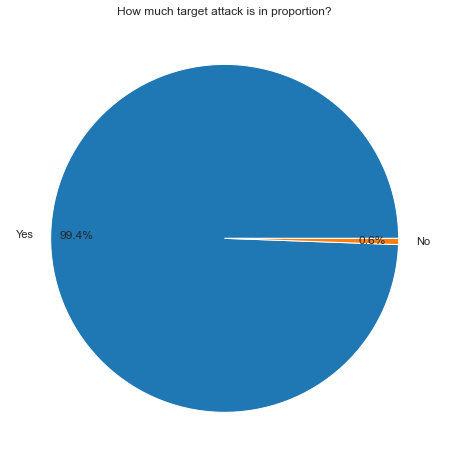

In [ ]:
# Treating Duplicate datapoints
print("Original data:",len(df))
print("Duplicated data:",df.duplicated().sum())
print("Non-Duplicated data:",len(df)-df.duplicated().sum())
print(df.drop_duplicates(inplace=False)['Target Attack'].value_counts())
sizes2 = dict(df.drop_duplicates(inplace=False)['Target Attack'].value_counts())

plt.figure(figsize=(12, 8))
plt.title("How much target attack is in proportion?")
plt.pie(sizes2.values(), labels=['Yes', 'No'], autopct="%.1f%%", pctdistance=0.85)

plt.show()

In [ ]:
X =df.drop(['Target Attack'], axis = 1)
y = df['Target Attack']

### Feature Selection

Correlation Coefficient

numeric               0.599252
special               0.582107
subdomain_length      0.572053
labels                0.569414
FQDN_count            0.563563
subdomain             0.502469
sld2                  0.303328
longest_word_hash2    0.298085
lower                 0.295599
longest_word_hash3    0.222509
sld3                  0.220566
len                   0.159437
entropy               0.119050
labels_max            0.096350
labels_average        0.077167
upper                 0.072895
longest_word_hash5    0.028035
sld4                  0.022631
longest_word_hash4    0.020868
sld1                  0.013066
longest_word_hash1    0.010427
sld5                  0.010096
Name: Target Attack, dtype: float64

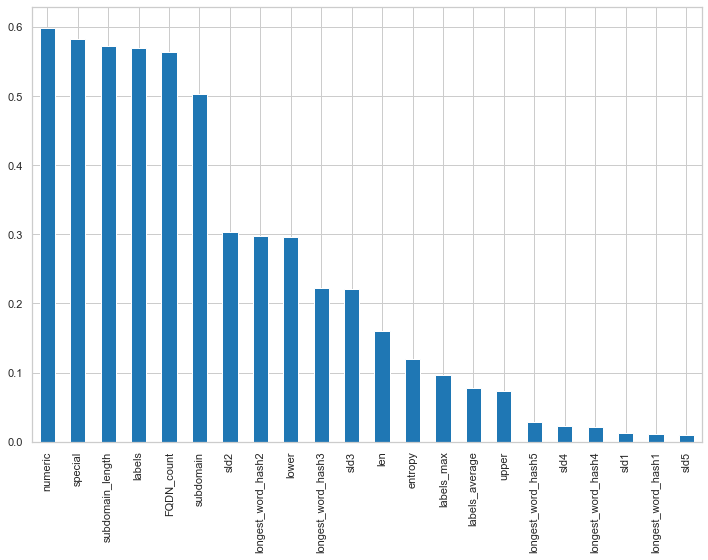

In [ ]:
target_corr1 = abs(df.corr()['Target Attack']).sort_values(ascending=False)[1:]
target_corr1.plot.bar()
target_corr1

In [ ]:
Feat_selected_corr = target_corr1[target_corr1>=0.15]
print(f'No. of features selected with Corr {len(Feat_selected_corr)}')
print(Feat_selected_corr.index.values)
Feat_Notselected_corr = target_corr1[target_corr1<0.15]
print(f'\n\nNo. of features discarded with Corr {len(Feat_Notselected_corr)}')
Feat_Notselected_corr.index.values

No. of features selected with Corr 12
['numeric' 'special' 'subdomain_length' 'labels' 'FQDN_count' 'subdomain'
 'sld2' 'longest_word_hash2' 'lower' 'longest_word_hash3' 'sld3' 'len']


No. of features discarded with Corr 10


array(['entropy', 'labels_max', 'labels_average', 'upper',
       'longest_word_hash5', 'sld4', 'longest_word_hash4', 'sld1',
       'longest_word_hash1', 'sld5'], dtype=object)

Information Gain

In [ ]:
imp = mutual_info_classif(X,y, random_state=22)

<AxesSubplot:>

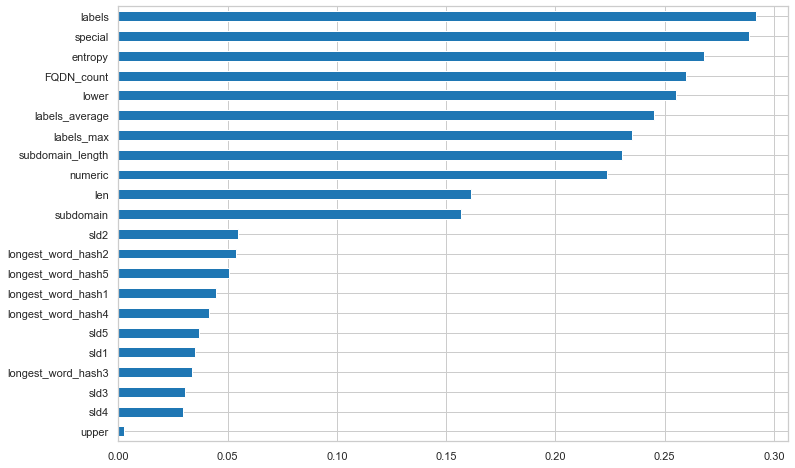

In [ ]:
feat_imp = pd.Series(imp, X.columns[0:len(X.columns)])
feat_imp.sort_values(ascending=True).plot(kind='barh')

In [ ]:
Feat_selected_IG = feat_imp[feat_imp>0.05]
print(f'No. of features selected with IG {len(Feat_selected_IG)}')
print(Feat_selected_IG.index.values)
Feat_Notselected_IG = feat_imp[feat_imp<0.05]
print(f'\n\nNo. of features discarded with IG {len(Feat_Notselected_IG)}')
Feat_Notselected_IG.index.values

No. of features selected with IG 14
['FQDN_count' 'subdomain_length' 'lower' 'numeric' 'entropy' 'special'
 'labels' 'labels_max' 'labels_average' 'len' 'subdomain'
 'longest_word_hash2' 'longest_word_hash5' 'sld2']


No. of features discarded with IG 8


array(['upper', 'longest_word_hash1', 'longest_word_hash3',
       'longest_word_hash4', 'sld1', 'sld3', 'sld4', 'sld5'], dtype=object)

Variance Threshold


In [ ]:
var_thresh = VarianceThreshold(threshold=0.5)
var_thresh.fit_transform(X)
Feat_selected_var_thresh = var_thresh.get_support()
print(f'No. of features selected with var_thresh {len(Feat_selected_var_thresh)}')
print(Feat_selected_var_thresh)




No. of features selected with var_thresh 22
[ True  True  True  True  True False  True  True  True  True  True False
 False False False False False False False False False False]


In [ ]:
X_new = X[Feat_selected_IG.index]
X_new

,FQDN_count,subdomain_length,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,longest_word_hash2,longest_word_hash5,sld2
0,27,10,10,11,2.570417,6,6,7,3.666667,14,1,1.0,0.0,-1.0
1,27,10,10,11,2.767195,6,6,7,3.666667,14,1,1.0,0.0,-1.0
2,26,9,10,10,2.742338,6,6,7,3.500000,13,1,1.0,0.0,-1.0
3,27,10,10,11,2.570417,6,6,7,3.666667,14,1,1.0,0.0,-1.0
4,15,9,11,0,2.929439,4,3,5,4.333333,15,1,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268069,18,3,16,0,2.338623,2,3,10,5.333333,14,1,0.0,-1.0,0.0
268070,27,10,10,11,2.767195,6,6,7,3.666667,14,1,1.0,0.0,-1.0
268071,27,10,10,11,2.767195,6,6,7,3.666667,14,1,1.0,0.0,-1.0
268072,16,0,14,0,3.249687,2,2,13,7.500000,14,0,0.0,0.0,1.0


##3. Model Building

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25, random_state=22)

In [ ]:
# Logistic Regression
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(random_state=22, max_iter=1000)) 

# parameters for grid search
param_grid_lr = {'logisticregression__C': [10, 100, 1000]}

# GRID SEARCH (using pipeline and param_grid along with cross-validation)
grid_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=5, n_jobs=-1)

# Fit train data to grid
grid_lr.fit(X_train, y_train)

print('Best cross-validation score : {:.2f}\n'.format(grid_lr.best_score_))
print('Best Parameters: ', grid_lr.best_params_)


Best cross-validation score : 0.83

Best Parameters:  {'logisticregression__C': 10}


In [ ]:
y_pred_lr = grid_lr.predict(X_test)
print('\n Test set Score: {:.2f}'.format(grid_lr.score(X_test, y_test)))
print('\n Confusion Matrix:\n', confusion_matrix(y_test, y_pred_lr))
print('\n Classification Report:\n', classification_report(y_test, y_pred_lr))


 Test set Score: 0.82

 Confusion Matrix:
 [[18519 11878]
 [  163 36459]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.61      0.75     30397
           1       0.75      1.00      0.86     36622

    accuracy                           0.82     67019
   macro avg       0.87      0.80      0.81     67019
weighted avg       0.86      0.82      0.81     67019



In [ ]:
# Random Forest Classifier
pipe_rf = make_pipeline(RandomForestClassifier(random_state=22, n_jobs=-1,class_weight='balanced',bootstrap=False, )) 
# parameters for grid search
# param_grid_rf = {'randomforestclassifier__n_estimators':[50, 100], 'randomforestclassifier__max_depth':[4,7,9], 'randomforestclassifier__criterion' :['gini','entropy']}
param_grid_rf = {'randomforestclassifier__n_estimators':[100], 'randomforestclassifier__max_depth':[7], 'randomforestclassifier__criterion' :['gini']}
# GRID SEARCH (using pipeline and param_grid along with cross-validation)
grid_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=5, n_jobs=-1, scoring="f1_micro" )

# Fit train data to grid
grid_rf.fit(X_train, y_train)

print('Best cross-validation score : {:.2f}\n'.format(grid_rf.best_score_))
print('Best Parameters: ', grid_rf.best_params_)


Best cross-validation score : 0.83

Best Parameters:  {'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 7, 'randomforestclassifier__n_estimators': 100}


In [ ]:
y_pred_rf = grid_rf.predict(X_test)
print('\n Test set Score: {:.2f}'.format(grid_rf.score(X_test, y_test)))
print('\n Confusion Matrix:\n', confusion_matrix(y_test, y_pred_rf))
print('\n Classification Report:\n', classification_report(y_test, y_pred_rf))


 Test set Score: 0.82

 Confusion Matrix:
 [[18525 11872]
 [   48 36574]]

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.61      0.76     30397
           1       0.75      1.00      0.86     36622

    accuracy                           0.82     67019
   macro avg       0.88      0.80      0.81     67019
weighted avg       0.86      0.82      0.81     67019



In [ ]:
# XGB Classifier
pipe_xgbc = make_pipeline(XGBClassifier(verbosity=1,random_state=22,n_jobs =-1))
#This take longer time to run.
# param_grid_xgbc = {'xgbclassifier__n_estimators': [300, 500, 1000],'xgbclassifier__reg_alpha': [0.001, 0.01, 0.1],'xgbclassifier__gamma': [0.001, 0.01, 0.1],'xgbclassifier__learning_rate': [0.001, 0.01, 0.1],'xgbclassifier__scale_pos_weight': [0.7, 0.8, 0.9, 1],'xgbclassifier__subsample': [0.7, 0.8, 0.9, 1],'xgbclassifier__min_child_weight':[1, 3, 5, 7, 9]}

# Tuned model
param_grid_xgbc = {'xgbclassifier__n_estimators': [3000],'xgbclassifier__reg_alpha': [0.01],'xgbclassifier__gamma': [0.001],'xgbclassifier__learning_rate': [0.1], 'xgbclassifier__scale_pos_weight': [0.9],'xgbclassifier__subsample': [0.9], 'xgbclassifier__min_child_weight':[1]}
grid_xgbc = GridSearchCV(pipe_xgbc, param_grid_xgbc, cv=5, n_jobs=-1, scoring="f1" )
grid_xgbc.fit(X_train, y_train)
print('Best cross-validation score : {:.2f}\n'.format(grid_xgbc.best_score_))
print('Best Parameters: ', grid_xgbc.best_params_)
print(grid_xgbc.cv_results_) 


Best cross-validation score : 0.86

Best Parameters:  {'xgbclassifier__gamma': 0.001, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__n_estimators': 3000, 'xgbclassifier__reg_alpha': 0.01, 'xgbclassifier__scale_pos_weight': 0.9, 'xgbclassifier__subsample': 0.9}
{'mean_fit_time': array([435.09349508]), 'std_fit_time': array([1.350106]), 'mean_score_time': array([2.88883567]), 'std_score_time': array([0.24162386]), 'param_xgbclassifier__gamma': masked_array(data=[0.001],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_xgbclassifier__learning_rate': masked_array(data=[0.1],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_xgbclassifier__min_child_weight': masked_array(data=[1],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_xgbclassifier__n_estimators': masked_array(data=[3000],
             mask=[False],
       fill_value='?',
            

In [ ]:
# XGB Classifier
pipe_xgbc = make_pipeline(XGBClassifier(verbosity=1,random_state=22,n_jobs =-1))
#This take longer time to run.
# param_grid_xgbc = {'xgbclassifier__n_estimators': [300, 500, 1000],'xgbclassifier__reg_alpha': [0.001, 0.01, 0.1],'xgbclassifier__gamma': [0.001, 0.01, 0.1],'xgbclassifier__learning_rate': [0.001, 0.01, 0.1],'xgbclassifier__scale_pos_weight': [0.7, 0.8, 0.9, 1],'xgbclassifier__subsample': [0.7, 0.8, 0.9, 1],'xgbclassifier__min_child_weight':[1, 3, 5, 7, 9]}

# Tuned model
param_grid_xgbc = {'xgbclassifier__n_estimators': [300, 500, 700, 1000]}
grid_xgbc = GridSearchCV(pipe_xgbc, param_grid_xgbc, cv=5, n_jobs=-1, scoring="f1" )
grid_xgbc.fit(X_train, y_train)
print('Best cross-validation score : {:.2f}\n'.format(grid_xgbc.best_score_))
print('Best Parameters: ', grid_xgbc.best_params_)
print(grid_xgbc.cv_results_) 


Best cross-validation score : 0.86

Best Parameters:  {'xgbclassifier__n_estimators': 500}
{'mean_fit_time': array([66.68143048]), 'std_fit_time': array([0.80629893]), 'mean_score_time': array([0.45415654]), 'std_score_time': array([0.06032101]), 'param_xgbclassifier__n_estimators': masked_array(data=[500],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'xgbclassifier__n_estimators': 500}], 'split0_test_score': array([0.864005]), 'split1_test_score': array([0.86470416]), 'split2_test_score': array([0.86423615]), 'split3_test_score': array([0.8627627]), 'split4_test_score': array([0.86528487]), 'mean_test_score': array([0.86419858]), 'std_test_score': array([0.00084099]), 'rank_test_score': array([1])}


In [ ]:
y_pred_xgbc = grid_xgbc.predict(X_test)
print('\n f1_score: {:.2f}'.format(metrics.f1_score(y_test, y_pred_xgbc)))
print('\n Test set Score: {:.2f}'.format(grid_xgbc.score(X_test, y_test)))
print('\n Confusion Matrix:\n', confusion_matrix(y_test, y_pred_xgbc))
print('\n Classification Report:\n', classification_report(y_test, y_pred_xgbc))


 f1_score: 0.86

 Test set Score: 0.86

 Confusion Matrix:
 [[18516 11881]
 [   12 36610]]

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.61      0.76     30397
           1       0.75      1.00      0.86     36622

    accuracy                           0.82     67019
   macro avg       0.88      0.80      0.81     67019
weighted avg       0.87      0.82      0.81     67019



##4. Model Inference

In [ ]:
# Save the Model 
pickle.dump(grid_xgbc, open('XGB_Model.pkl', 'wb'))

In [ ]:
# Test the saved model
loaded_model = pickle.load(open('XGB_Model.pkl', 'rb'))
pred = loaded_model.score(X_test, y_test)
print(pred)

0.8602681141541244
